In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import keras
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img
from keras.applications.inception_resnet_v2 import InceptionResNetV2,preprocess_input,decode_predictions
from keras.layers import Dense,Flatten,GlobalAveragePooling2D,Dropout
from keras.optimizers import Adam

In [3]:
# Define the data augmentation parameters
seed=42
train_datagen=ImageDataGenerator(zoom_range=0.5,
                                 rotation_range=0.4,
                                 shear_range=0.3,
                                 width_shift_range=0.3,
                                 horizontal_flip=True,
                                 brightness_range=[0.8, 1.2],
                                 preprocessing_function=preprocess_input)
val_datagen=ImageDataGenerator(zoom_range=0.5,
                                 rotation_range=0.4,
                                 shear_range=0.3,
                                 width_shift_range=0.3,
                                 horizontal_flip=True,
                                 brightness_range=[0.8, 1.2],
                               preprocessing_function=preprocess_input)
# Load the training and validation data
train=train_datagen.flow_from_directory(directory=r"C:\Users\AVIGHYAT\dermno_copy\train",target_size=(256,256),batch_size=32,seed=seed)
val=val_datagen.flow_from_directory(directory=r"C:\Users\AVIGHYAT\dermno_copy\val",target_size=(256,256),batch_size=32,seed=seed)

Found 1678 images belonging to 9 classes.
Found 601 images belonging to 9 classes.


In [3]:
# Get a sample of the training data
t_img,label=train.next()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


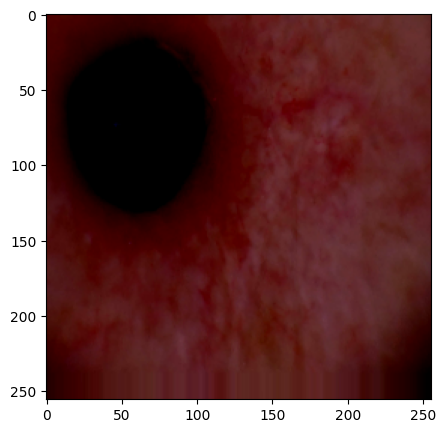

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


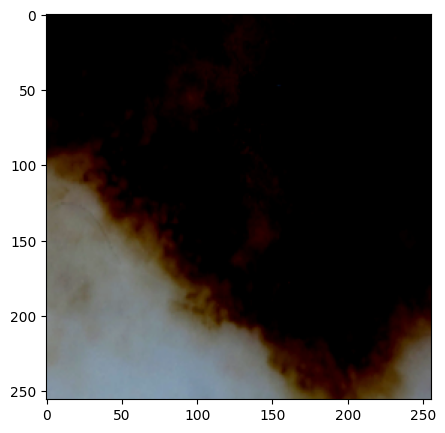

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


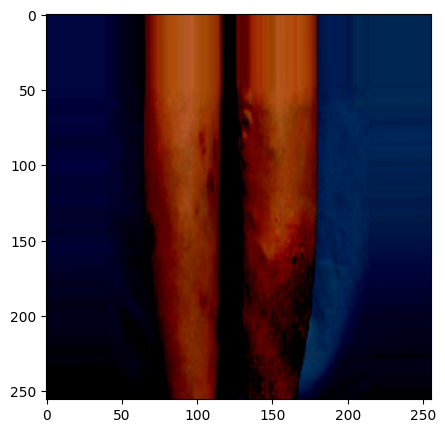

In [4]:
# Plot the sample images
def plotImage(img_arr,label):
  for im,l in zip(img_arr,label):
    plt.figure(figsize=(5,5))
    plt.imshow(im)
    plt.show()

plotImage(t_img[:3],label[:3])

In [5]:
from keras.layers import Dense,Flatten
from keras.models import Model
from keras.applications.inception_resnet_v2 import InceptionResNetV2
import keras

# Load the pre-trained VGG19 model
base_model=InceptionResNetV2(input_shape=(256,256,3),weights='imagenet',include_top=False)

219055592/219055592 [==============================] - 69s 0us/step


In [8]:
# Freeze the weights of the pre-trained model
for layer in base_model.layers:
  layer.trainable=True

In [9]:
# Add a new classification head to the model
X= GlobalAveragePooling2D()(base_model.output)
X = Dropout(0.5)(X)
X= Dense(1024, activation='relu')(X)
predictions=Dense(units=9,activation='softmax')(X)

# Create the model
model=Model(inputs=base_model.input,outputs=predictions)

In [10]:
base_model.summary()

Model: "inception_resnet_v2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 127, 127, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 127, 127, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 127, 127, 32)         0         ['batch_norm

In [11]:
# Compile the model
model.compile(optimizer= Adam(learning_rate=0.0001),loss=keras.losses.categorical_crossentropy,metrics=['accuracy'])

In [12]:
# Define the callbacks
from keras.callbacks import ModelCheckpoint,EarlyStopping
es=EarlyStopping(monitor='accuracy',min_delta=0.01,patience=5,verbose=1)
mc=ModelCheckpoint(filepath="./Dermno_RenseNet.h5",monitor='accuracy',min_delta=0.01,patience=3,verbose=1,save_best_only= True)
cb=[mc,es]

In [13]:
# Train the model
his=model.fit_generator(train,steps_per_epoch=len(train),epochs=30,verbose=1,callbacks=cb,validation_data=val,validation_steps=16)

C:\Users\AVIGHYAT\AppData\Local\Temp\ipykernel_24944\2039525823.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  his=model.fit_generator(train,steps_per_epoch=len(train),epochs=30,verbose=1,callbacks=cb,validation_data=val,validation_steps=16)


Epoch 1/30
53/53 [==============================] - ETA: 0s - loss: 1.8096 - accuracy: 0.3248 
Epoch 1: accuracy improved from -inf to 0.32479, saving model to .\Dermno_RenseNet.h5


C:\Users\AVIGHYAT\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


53/53 [==============================] - 883s 16s/step - loss: 1.8096 - accuracy: 0.3248 - val_loss: 1.9344 - val_accuracy: 0.3516
Epoch 2/30
53/53 [==============================] - ETA: 0s - loss: 1.1558 - accuracy: 0.5852 
Epoch 2: accuracy improved from 0.32479 to 0.58522, saving model to .\Dermno_RenseNet.h5
53/53 [==============================] - 984s 18s/step - loss: 1.1558 - accuracy: 0.5852 - val_loss: 1.4622 - val_accuracy: 0.4414
Epoch 3/30
53/53 [==============================] - ETA: 0s - loss: 0.8836 - accuracy: 0.6800 
Epoch 3: accuracy improved from 0.58522 to 0.67998, saving model to .\Dermno_RenseNet.h5
53/53 [==============================] - 1088s 21s/step - loss: 0.8836 - accuracy: 0.6800 - val_loss: 1.6470 - val_accuracy: 0.4941
Epoch 4/30
53/53 [==============================] - ETA: 0s - loss: 0.7089 - accuracy: 0.7449 
Epoch 4: accuracy improved from 0.67998 to 0.74493, saving model to .\Dermno_RenseNet.h5
53/53 [==============================] - 1147s 22s/ste

In [17]:
# Load the reference dictionary
ref=dict(zip(list(train.class_indices.values()),list(train.class_indices.keys())))

In [2]:
# Define a function to make predictions
def prediction(image_path):
     img=load_img(image_path,target_size=(256,256))
     i=img_to_array(img)
     im=preprocess_input(i)
     img=np.expand_dims(im,axis=0)
     pred=np.argmax(model.predict(img))
     print(f"the image belongs to {ref[pred]}")
     plt.imshow(i.astype(int))
     plt.axis('off')
     plt.show()

In [ ]:
image_path = input("Enter the image path: ")
image_path = image_path.strip('"')
prediction(image_path)